# __Call__ magic method
- 객체를 함수처럼 호출 할 수 있도록 한다.
- `객체()` 로 호출 할 때 __call__ 메소드가 호출되어 실행된다.

# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 모델을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력 받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.

```python
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 

### Sequential

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers, models

In [ ]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape=(32,32,3)))

seq_model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding="same"))
seq_model.add(layers.Flatten())

seq_model.add(layers.Dense(units=256, activation='relu'))
seq_model.add(layers.Dense(units=10, activation='softmax', name='output_layer'))
seq_model.summary()

### Functional API

In [ ]:
input_tensor = layers.Input(shape=(32,32,3))

conv_tensor = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)

pool_tensor = layers.MaxPool2D(padding='same')(conv_tensor)

flatten_tensor = layers.Flatten()(pool_tensor)

dense_tensor = layers.Dense(units=256, activation='relu')(flatten_tensor)
dense_tensor2 = layers.Dense(units=128)(dense_tensor)

bn_tensor = layers.BatchNormalization()(dense_tensor2)
relu_tensor = layers.ReLU()(bn_tensor)

output_tensor = layers.Dense(units=10, activation='softmax')(relu_tensor)

fn_model = models.Model(input_tensor, output_tensor)

In [22]:
fn_model.summary()

In [ ]:
keras.utils.plot_model(fn_model, show_shapes=True)

##### 각 Layer의 출력 변수들 통일. 
- 일반적으로 block 단위로 동일한 변수명을 사용.

In [ ]:
input_tensor = layers.Input(shape=(32,32,3))

x1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.MaxPooling2D(padding="same")(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding="same")(x2)


x3 = layers.Flatten()(x2)
x3 = layers.Dense(units=8, activation='relu')(x3)

output_tensor = layers.Dense(units=1, activation='sigmoid')(x3)

fn_model = models.Model(input_tensor, output_tensor)

In [ ]:
fn_model.summary()

In [ ]:
keras.utils.plot_model(fn_model)

##### trainable 설정

In [ ]:
input_tensor = layers.Input(shape=(32,32,3))

conv_layer = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
conv_layer.trainable = False

x1 = conv_layer(input_tensor) 
x1 = layers.MaxPooling2D(padding="same")(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding="same")(x2)


x3 = layers.Flatten()(x2)
x3 = layers.Dense(units=8, activation='relu')(x3)

output_tensor = layers.Dense(units=1, activation='sigmoid')(x3)

fn_model = models.Model(input_tensor, output_tensor)
fn_model.summary()

##### Transfer learning

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(include_top=False)
conv_base.trainable=False

input_tensor = layers.Input(shape=(224,224,3))
x = conv_base(input_tensor)
x = layers.GlobalAveragePooling2D()(x)

output_tensor = layers.Dense(units=1, activation='sigmoid')(x)

model = models.Model(input_tensor, output_tensor)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

## 레이어 합치기
- 함수와 Layer class 두가지 방식을 제공한다.
- **concatenate(list, axis=-1)/Concatenate()[list]**
    - 레이어들을 합친다
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- **add(list)/Add()(list), substract(list)/Subtract()(list), multiply(list)/Multiply()(list)**
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [18]:
input_tensor = layers.Input(shape=(32,32,3))

x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(input_tensor)

x1 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)

x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x1)
x2 = layers.BatchNormalization()(x2)

add_result = layers.Add()([x, x2])
output_tensor = layers.ReLU()(add_result)

rb_model = models.Model(input_tensor, output_tensor)

In [19]:
rb_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 64)   36928       conv2d_3[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 64)   256         conv2d_4[0][0]                   
______________________________________________________________________________________________

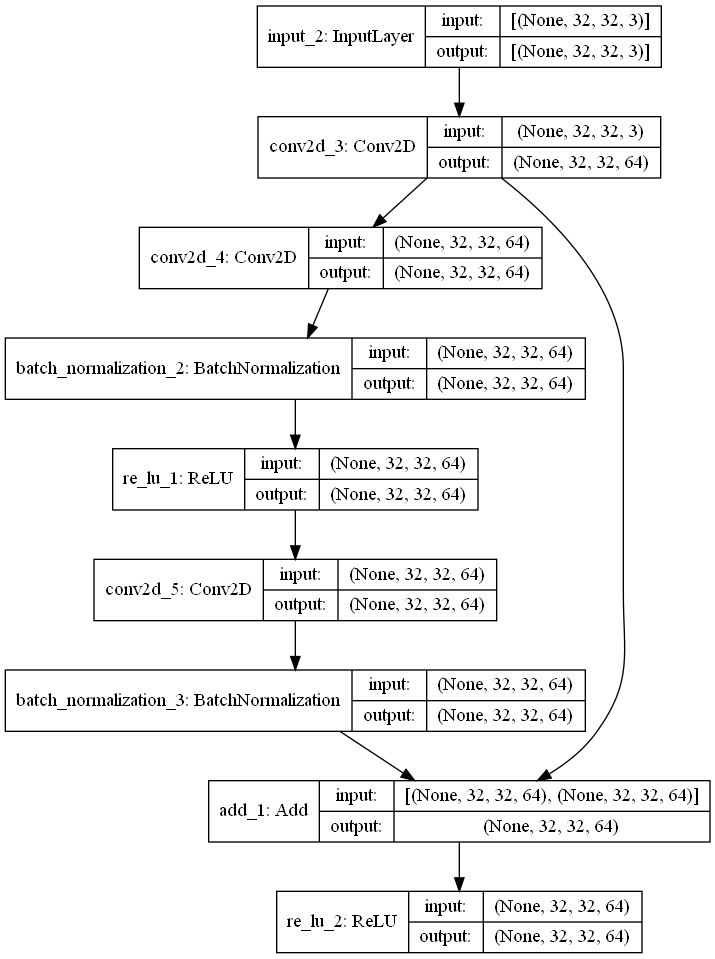

In [20]:
keras.utils.plot_model(rb_model, show_shapes=True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃잎의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape, y.shape

In [ ]:
y1 = X[:, 2]
y2 = X[:, 3]
y3 = y

X = X[:, [0,1]]

X.shape, y1.shape, y2.shape, y3.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

##### 모델 정의 및 컴파일

In [ ]:
input_tensor = layers.Input((2, ))

x = layers.Dense(units=16, activation='relu')(input_tensor)
x = layers.Dense(units=8, activation='relu')(x)

output1 = layers.Dense(units=1, name='petal_width_output')(x)  
output2 = layers.Dense(units=1, name='petal_length_output')(x) 
output3 = layers.Dense(units=3, activation='softmax', name='species_output')(x)

model = models.Model(input_tensor, [output1, output2, output3])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss=['mse', 'mse', 'sparse_categorical_crossentropy']) 

##### 학습

In [ ]:
hist = model.fit(X, 
                [y1, y2, y3],
                epochs=100,
                validation_split=0.1)

##### 결과 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')

plt.legend()
plt.show()

##### 새로운 데이터 추론

In [ ]:
model.evaluate(X, [y1, y2, y3])

In [ ]:
import numpy as np
new_data = X[0]
new_data = new_data[np.newaxis, ...]
new_data

model.predict(new_data)

In [ ]:
print(y1[0])
print(y2[0])
print(y3[0])

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

##### 데이터 로드

In [ ]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

In [ ]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_img = X_train[:150]
X_train.shape, X_img.shape

##### 모델생성, 컴파일

In [ ]:
iris_info_tensor = layers.Input(shape=(4,)) 
x1 = layers.Dense(units=32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(units=16, activation='relu')(x1)

iris_img_tensor = layers.Input(shape=(28, 28, 1))

x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same',  activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same',  activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)
x3 = layers.GlobalAveragePooling2D()(x3)

x4 = layers.concatenate([x1, x3])

output_tensor = layers.Dense(units=3, activation='softmax')(x4)

model = models.Model([iris_info_tensor, iris_img_tensor] , output_tensor)


In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=[X, X_img],
          y=y, 
          epochs=2,
          validation_split=0.1)